### Salary Prediction:
We will try to predict salary based on their years of exeprience. We use Linear Regression algorithm to model this probelm.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#Importing the dataset
dataset=pd.read_csv("../input/salary-data-simple-linear-regression/Salary_Data.csv")
print ("Data shape {}".format(dataset.shape))

Data shape (30, 2)


In [3]:
# Sample data
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0



### Data Preprocessing:
We will look for duplicate records and drop them. We can see below there are no duplicate records in the data.
We wil find any null values in the data and drop them if any found. There are no null values found in the dataset.

In [4]:
# Data type of each feature 
dataset.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [5]:
#we will find and remove the duplicate entries in the datset
dataset.drop_duplicates(inplace = True)
print ("Data shape after dropping duplicates {}".format(dataset.shape))

Data shape after dropping duplicates (30, 2)


In [6]:
#Checking for any null entries column wise, We can see that there are 0 null entries
print (pd.DataFrame(dataset.isnull().sum()))

                 0
YearsExperience  0
Salary           0


In [7]:
# Feature data
x=dataset['YearsExperience'].values
y=dataset['Salary'].values
print(x)
print(x.shape)
print("\n")
print(y)
print(y.shape)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
(30,)


[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
(30,)


### Splitting The Data into Train and Test:

The training data is used to make sure the machine recognizes patterns in the data.

The test data is used to see how well the machine can predict new answers based on its training.

In [8]:
#splitting the data into Training set and Test set 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print("X_train shape {}, y_train shape {}".format(x_train.shape, y_train.shape))
print("\n")
print("X_test shape {}, y_test shape {}".format(x_test.shape, y_test.shape))


X_train shape (22,), y_train shape (22,)


X_test shape (8,), y_test shape (8,)


### Linear Regression Introduction:
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable.


In [9]:
#Fitting Simple Linear Regression to Training set
regressor=LinearRegression()
regressor.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

In [10]:
#Predicting the Test set results
y_pred=regressor.predict(x_test.reshape(-1,1))
print(y_pred)

[ 41056.25705466 123597.70938378  65443.50433372  63567.56223533
 116093.94099022 108590.17259667 117031.91203942  64505.53328452]


### Results Analysis:
Based on the above analysis we visualize the Training set results and Test set results.

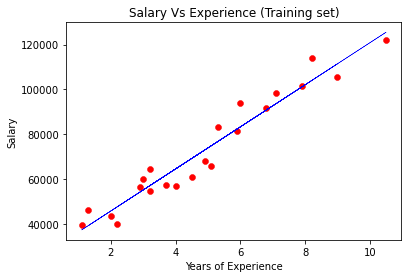

In [11]:
#visualising the traing set results
plt.scatter(x_train,y_train,c="red",lw=0.5)
plt.plot(x_train,regressor.predict(x_train.reshape(-1,1)),c="blue",lw=0.5)
plt.title("Salary Vs Experience (Training set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

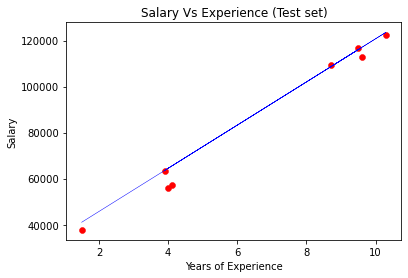

In [12]:
#visualising the test set results
plt.scatter(x_test,y_test,c="red",lw=0.5)
plt.plot(x_test,regressor.predict(x_test.reshape(-1,1)),c="blue",lw=0.5)
plt.title("Salary Vs Experience (Test set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

* We use Root Mean squared error as regression loss and we try to minimze it.

In [13]:
rmse = mean_squared_error(y_test, y_pred, squared=True)
rmse

22407940.143340684

Conclusion:

From the above results we made a simple linear regression model that is perfectly able to predict the observations